# **Ch.03 Multivariate Normal Distribution** 

$$f(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^{\mathcal{D}} |\boldsymbol{\Sigma}|}} \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

# x의 shape는 (1, D)
# mu의 shape는 (1, D)
# cov의 shape는 (D, D)

In [9]:
x = np.array([[0], [0]])
mu = np.array([[1], [2]])
cov = np.array([[1, 0],
               [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)

[[0.01306423]]


위 함수는 0, 0 좌표에서의 확률밀도를 계산한다. 

In [10]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)

In [12]:
x, y

(array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
        -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
        -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
        -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
        -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
         1.77635684e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
         4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
         8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
         1.20000000e+00,  1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
         1.60000000e+00,  1.70000000e+00,  1.80000000e+00,  1.90000000e+00]),
 array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
        -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
        -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
        -8

In [11]:
X, Y

(array([[-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        ...,
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9]]),
 array([[-2. , -2. , -2. , ..., -2. , -2. , -2. ],
        [-1.9, -1.9, -1.9, ..., -1.9, -1.9, -1.9],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ 1.7,  1.7,  1.7, ...,  1.7,  1.7,  1.7],
        [ 1.8,  1.8,  1.8, ...,  1.8,  1.8,  1.8],
        [ 1.9,  1.9,  1.9, ...,  1.9,  1.9,  1.9]]))

In [13]:
Z = X ** 2 + Y ** 2

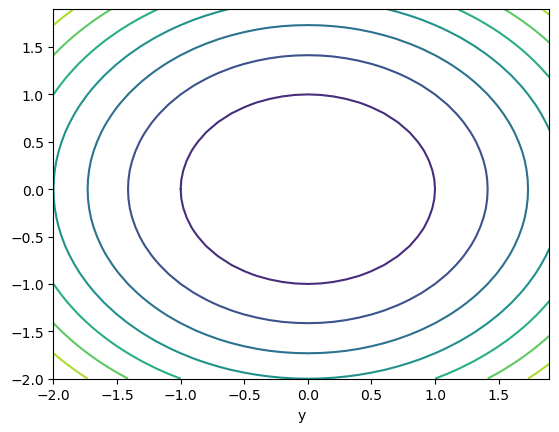

In [16]:
ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_xlabel('y')
plt.show()

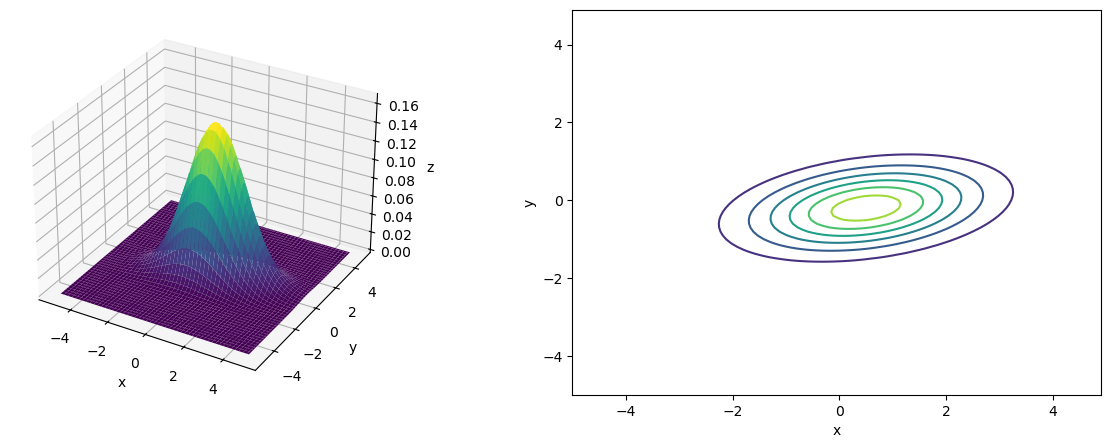

In [26]:
mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3],
               [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(Y.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1, projection= '3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()

공분산은 두 변수의 관련성을 나타낸다. 공분산이 양수면 변수 하나의 값이 증가하면 다른 하나도 증가하는 경향성이 있다.
0에 가까우면 두 변수는 상관이 없다는 것이다.

$\hat{\boldsymbol{\mu}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{x}_i$

$\hat{\boldsymbol{\Sigma}} = \frac{1}{N} \sum_{i=1}^{N} (\mathbf{x}_i - \hat{\boldsymbol{\mu}})(\mathbf{x}_i - \hat{\boldsymbol{\mu}})^\top$


In [30]:
import numpy as np

np.random.seed(0)
N = 10000
D = 2
xs = np.random.rand(N, D) #  균등분포

In [31]:
xs, xs.shape

(array([[0.5488135 , 0.71518937],
        [0.60276338, 0.54488318],
        [0.4236548 , 0.64589411],
        ...,
        [0.95355073, 0.74817451],
        [0.29826661, 0.44645576],
        [0.36012661, 0.62588665]]),
 (10000, 2))

In [32]:
mu = np.sum(xs, axis=0)
mu /= N
cov = 0

In [33]:
mu

array([0.49443495, 0.49726356])

In [37]:
for n in range(N):
    x = xs[n] # (2,)
    z = x - mu # (2,)
    z = z[:, np.newaxis] #이게 있어야 행렬곱이 가능하다 # (2, 1)
    cov += z @ z.T # (2, 1) @ (1, 2) = (2, 2)

cov /= N
print(mu)
print(cov)

[0.49443495 0.49726356]
[[ 0.08477167 -0.0002313 ]
 [-0.0002313   0.08395496]]


In [36]:
z

array([[-0.13430833],
       [ 0.12862308]])

In [38]:
path = 'height_weight.txt'
xs = np.loadtxt(path)

xs.shape

(25000, 2)

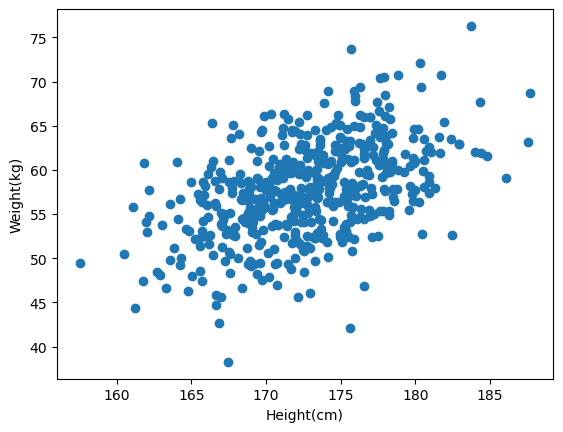

In [39]:
small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

In [40]:
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

In [42]:
cov

array([[23.33145108, 12.84736477],
       [12.84736477, 27.97658708]])

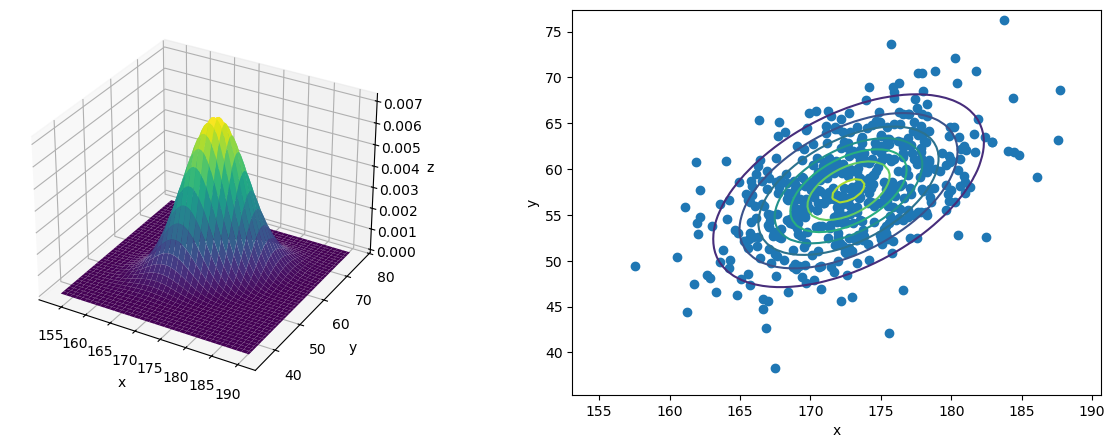

In [48]:
x_min, x_max = xs[:, 0].min(), xs[:, 0].max()
y_min, y_max = xs[:, 1].min(), xs[:, 1].max()

x_range = np.arange(x_min, x_max, 0.5)
y_range = np.arange(y_min, y_max, 0.5)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(Y.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1, projection= '3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.scatter(small_xs[:, 0], small_xs[:, 1])
ax2.contour(X, Y, Z)
plt.show()